In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import gt_cvx, soft_thr

sns.set_theme()
sns.set_context("paper")

experiment_dir = "./experiments/"
fig_dir = os.path.join(experiment_dir, "figures")
os.makedirs(fig_dir, exist_ok=True)


In [12]:
RESULTS_DIR = "experiments/results/"
NORMALIZE = True  # normalize the offset

model2file = {
    "L2": "l2",
    "L1": "l1",
    "PM_0.5": "l_0.5",
    "PM_0.4": "l_0.4",
    "PM_0.3": "l_0.3",
    "PM_0.2": "l_0.2",
    "PM_0.1": "l_0.1",
}

model2label = {
    "L2": r"$\ell_2$",
    "L1": r"$\ell_1$",
    "PM_0.5": r"$\mathcal{L}_{PM}, \gamma=0.5$",
    "PM_0.4": r"$\mathcal{L}_{PM}, \gamma=0.4$",
    "PM_0.3": r"$\mathcal{L}_{PM}, \gamma=0.3$",
    "PM_0.2": r"$\mathcal{L}_{PM}, \gamma=0.2$",
    "PM_0.1": r"$\mathcal{L}_{PM}, \gamma=0.1$",
}

model_list = ["L2", "L1", "PM_0.5", "PM_0.3", "PM_0.1"]

x_dict = {}
y_dict = {}
c_dict = {}
p_dict = {}
for m in model_list:
    results = np.load(
        os.path.join(RESULTS_DIR, model2file[m] + ".npy"), allow_pickle=True
    ).item()
    x_dict[m] = results["x"]
    y_dict[m] = results["y"]
    c_dict[m] = results["c"]
    p_dict[m] = results["p"]


In [13]:
if NORMALIZE:
    for m in model_list:
        c_dict[m] = c_dict[m] - np.min(c_dict[m])
        p_dict[m] = p_dict[m] - np.min(p_dict[m])


## Plot

In [14]:
def plot(x, y, c, p, lb, fig, axes, i):
    axes = axes[:, i]
    # learned prox
    ax = axes[0]
    ax.plot(x, y, label="LPN")
    ax.plot(x, soft_thr(x), "--", label=r"$prox_{|\cdot|}$", zorder=1.9)
    ax.set_title(lb)
    if i == 0:
        ax.legend()

    # convex function
    ax = axes[1]
    ax.plot(x, c, label="LPN")
    ax.plot(x, gt_cvx(x), "--", label="Reference", zorder=1.9)
    if i == 0:
        ax.legend()

    # original function
    ax = axes[2]
    ax.plot(x, p, label="LPN")
    # L1
    ax.plot(x, np.abs(x), "--", label=r"$|\cdot|$", zorder=1.9)
    if i == 0:
        ax.legend()


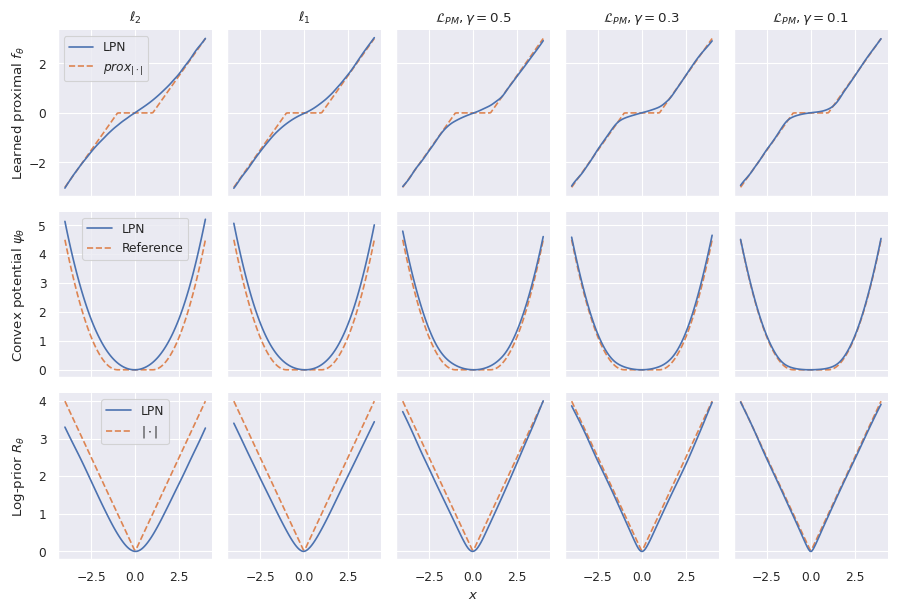

In [15]:
nc, nr = len(model_list), 3
figw = 9
figh = figw / nc * nr / 2 * 2.3
fig, axes = plt.subplots(nr, nc, sharex=True, sharey="row", figsize=(figw, figh))
for i, m in enumerate(model_list):
    plot(x_dict[m], y_dict[m], c_dict[m], p_dict[m], model2label[m], fig, axes, i)

# add vertical title
for i, t in zip(
    range(nr),
    [
        r"Learned proximal $f_\theta$",
        r"Convex potential $\psi_\theta$",
        r"Log-prior $R_\theta$",
    ],
):
    ax = axes[i, 0]
    ax.annotate(
        t,
        xy=(-0.2, 0.5),
        xycoords="axes fraction",
        ha="right",
        va="center",
        rotation=90,
    )

axes[2, 2].set_xlabel(r"$x$")


sns.despine()
fig.tight_layout()

fig.savefig(os.path.join(fig_dir, "laplacian_supp.pdf"), bbox_inches="tight")
fig.show()
